<a href="https://colab.research.google.com/github/owenfab/IDS/blob/main/HW4/problem1_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IDS HW 4
##Owen Fabula
##Problem 1: R

##Part 1: Reading Data in and Data cleansing
First, I read the data in to a frame from the raw csv file on GitHub.

In [ ]:
#import Hmisc
install.packages("Hmisc")
library(Hmisc)
#reading in raw csv file
library(readr)
adultTraining <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv", show_col_types = FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




 Before I could perform any analysis on the data, I had to cleanse the data. Upon printing out the table, I noticed that some rows had '?' values, and I figured that they might be the stand-in for NA in the original data set. To confirm this, I used the following code:

In [ ]:
summary(adultTraining)
#see the NA values
cat("num NA in whole frame: ",sum(is.na(adultTraining)))
adultTraining

      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

num NA in whole frame:  0

age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K
38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K
43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
54,?,10,Married-civ-spouse,?,Male,0,0,>50K


The above code printed 0, so I knew that '?' was being used as a placeholder. I also noticed that some values in the capital-gain column were 99999, which made no sense and must have been inputted as a placeholder as well. To rectify the missing values, I first changed each '?' to NA (and 99999 to NA for capital-gain), and then imputed by the appropriate value (mean for numeric columns, mode for categorical columns). I imputed by the mean for those values too. The following code does what was described above.

In [ ]:
#make own mode function - see references
mymode <- function(v) {
  uniqueVals <- unique(v)
  uniqueVals[{which.max(tabulate(match(v,uniqueVals)))}]
}
#use the inline ifelse to change each '?' to NA; have to do this by column
adultTraining$age <- ifelse(adultTraining$age == "?", yes=NA, no=adultTraining$age)
adultTraining$workclass <- ifelse(adultTraining$workclass == "?", yes=NA, no=adultTraining$workclass)
adultTraining$education <- ifelse(adultTraining$education == "?", yes=NA, no=adultTraining$education)
adultTraining$`marital-status` <- ifelse(adultTraining$`marital-status` == "?", yes=NA, no=adultTraining$`marital-status`)
adultTraining$occupation <- ifelse(adultTraining$occupation == "?", yes=NA, no=adultTraining$occupation)
adultTraining$sex <- ifelse(adultTraining$sex == "?", yes=NA, no=adultTraining$sex)
adultTraining$`capital-gain` <- ifelse(adultTraining$`capital-gain` == "?", yes=NA, no=adultTraining$`capital-gain`)
adultTraining$`capital-gain` <- ifelse(adultTraining$`capital-gain` == 99999, yes=NA, no=adultTraining$`capital-gain`) #need this for capital-gain as well because of the placeholder
adultTraining$`capital-loss` <- ifelse(adultTraining$`capital-loss` == "?", yes=NA, no=adultTraining$`capital-loss`)
adultTraining$income <- ifelse(adultTraining$income == "?", yes=NA, no=adultTraining$income)
#check if worked
cat("num NA in whole frame: ",sum(is.na(adultTraining)),"\n")
#now impute by mean for numeric columns and mode for categorical columns
adultTraining$age <- with(adultTraining,impute(age,mean))
adultTraining$workclass <- with(adultTraining,impute(workclass,mymode(adultTraining$workclass)))
adultTraining$education <- with(adultTraining,impute(education,mean))
adultTraining$`marital-status` <- with(adultTraining,impute(`marital-status`,myMode(adultTraining$`marital-status`)))
adultTraining$occupation <- with(adultTraining,impute(occupation,mymode(adultTraining$occupation)))
adultTraining$sex <- with(adultTraining,impute(sex,mymode(adultTraining$sex)))
adultTraining$`capital-gain` <- with(adultTraining,impute(`capital-gain`,mean))
adultTraining$`capital-loss` <- with(adultTraining,impute(`capital-loss`,mean))
adultTraining$income <- with(adultTraining,impute(income,mymode(adultTraining$income)))
#check if imputation worked
cat("num NA in whole frame: ",sum(is.na(adultTraining)))
adultTraining

num NA in whole frame:  1732 
num NA in whole frame:  0

age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
<dbl>,<impute>,<dbl>,<chr>,<impute>,<chr>,<impute>,<dbl>,<chr>
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K
38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K
43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
54,Private,10,Married-civ-spouse,Prof-specialty,Male,0,0,>50K


##Part 2: Creating and plotting Contingency Tables
###Contingency table between workclass and sex
To create and plot a contingency table between the workclass and sex columns, I used the following code:

                  Female Male
                             
Federal-gov          149  305
Local-gov            377  592
Never-worked           1    4
Private             3951 7159
Self-emp-inc          54  444
Self-emp-not-inc     178  992
State-gov            201  385
Without-pay            1    4

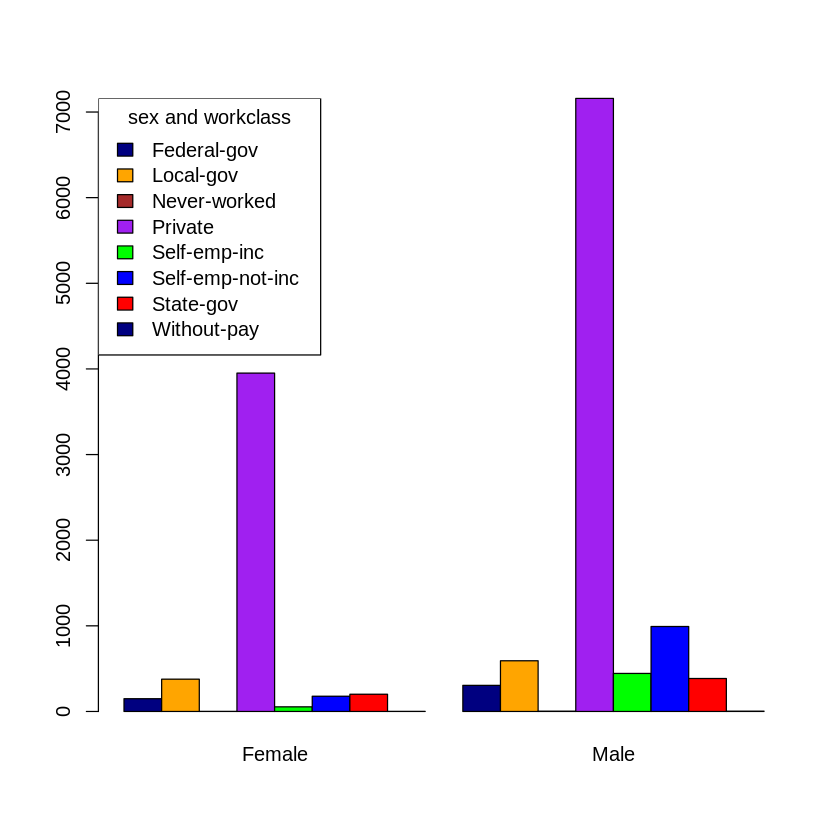

In [31]:
#create contingency table
wc_s_crosstab <- table(adultTraining$workclass,adultTraining$sex)
ftable(wc_s_crosstab)

#plot the table
color <- c("navy", "orange", "brown", "purple", "green", "blue", "red", "navy", "navy", "orange", "purple", "purple", "green", "blue", "red","navy")
barplot( wc_s_crosstab, cex.names = 1, col = color, beside = TRUE)
legend("topleft", legend = c("Federal-gov","Local-gov","Never-worked","Private","Self-emp-inc","Self-emp-not-inc","State-gov","Without-pay"), fill = color, title = "sex and workclass")

From the above output, one can see that, relative to females, males hold more positions in every kind of position found in the workclass column.

###Contingency table between sex and marital status
To create and plot a contingency table between the sex and marital-status columns, I used the following code:

        Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                                           
Female      1219                 7                761                    95          2160       290     380
Male         795                 4               6010                   104          2717       182      73

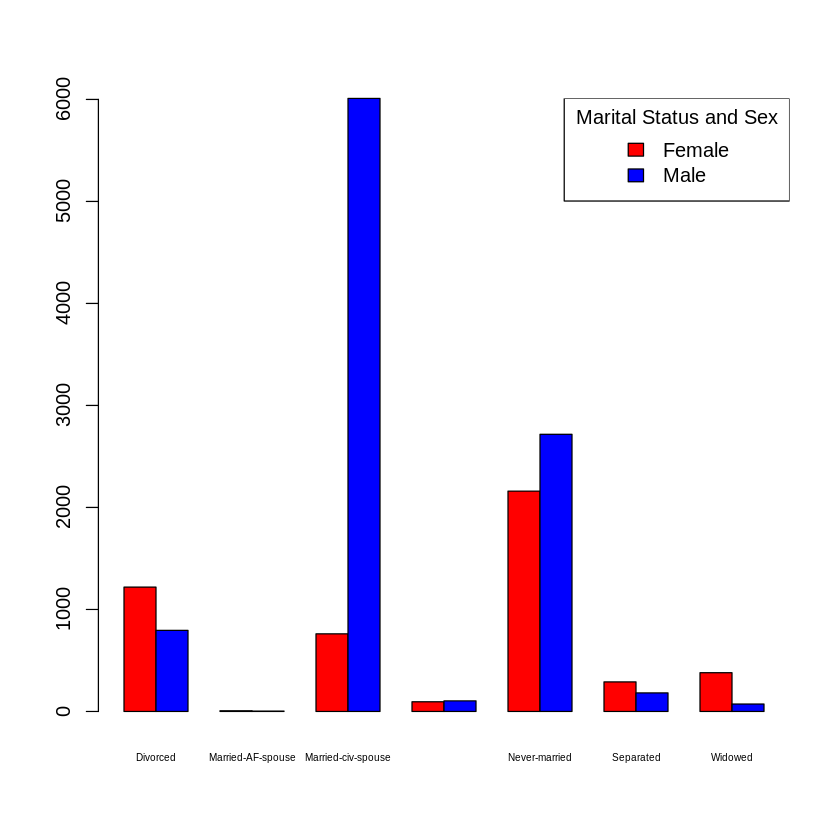

In [32]:
#create contingency table
s_m_crosstab <- table(adultTraining$sex,adultTraining$`marital-status`)
ftable(s_m_crosstab)

color <- c("red","blue")

#plot the table
barplot(s_m_crosstab, cex.names = .5, col=color, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = color, title = "Marital Status and Sex")

From the above, one can see that females have more representation in the Divorced, Married-AF-Spouse, Separated, and Widowed categories, while males hold more in the other categories.

##Part 3: Creating the adultOver40 dataframe
The dataframe adultOver40 needed all the data from adultTraining but only from those rows with age > 40. To create this dataframe, I first added each column from adultTraining to adultOver40, with an inline ifelse statement to add the age value if age > 40 and NA otherwise.<br />Now all I needed to do was drop each row that contained an NA, and I had a dataframe that contained the data from adultTraining but only with people older than 40.

In [ ]:
#new data frame
#first, add each row from adultTraining, but NA each age <= 40
adultOver40 <- data.frame(
  age = ifelse(adultTraining$age > 40, yes=adultTraining$age, no=NA),
  workclass = adultTraining$workclass,
  education = adultTraining$education,
  marital = adultTraining$`marital-status`,
  occuptation = adultTraining$occupation,
  sex = adultTraining$sex,
  capitalGain = adultTraining$`capital-gain`,
  capitalLoss = adultTraining$`capital-loss`,
  income = adultTraining$income
)
#now, delete all rows with NA (there should be no other NA values because we already imputed adultTraining)
adultOver40 <- na.omit(adultOver40)

###New Contingency table between sex and marital status
To create a contingency table between sex and marital status with the new dataframe, I used the following code:

In [ ]:
#create & display contingency table between sex and marital
over40_sm_crosstab <- table(adultOver40$sex,adultOver40$marital)
ftable(over40_sm_crosstab)

        Divorced Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                         
Female       720                305                    38           256       133     354
Male         448               3383                    47           315        74      71

The most noticable difference between the adultOver40 sex and marital-status conintgency table is that there are no adults over 40 whose marital status fits into the Married-AF-spouse category. One again, though, it seems as though there are more female people in the Divorced, Separated, and Widowed categorires, and more male people in the Married-civ-spouse, Married-spouse-absent, and Never-married categories.

##Part 4: Finding outliers in the education field
To find any outliers for the education column, I used the R function scale, which does z-score scaling by default and placed those values into a new column in a new dataframe. I then made another new column that added the values of the z-score if it was either < -3 or > 3 (i.e., an outlier).

In [ ]:
#scale the education column
scaled_edu <- data.frame(
  edu = scale(x=adultTraining$education)
)
#check if there are z-scores < -3
scaled_edu$outlier <- ifelse(scaled_edu$edu < -3 | scaled_edu$edu > 3, yes=scaled_edu$edu, no=NA)
cat("num z-scores < -3 or > 3:",sum(!is.na(scaled_edu$outlier)),"\n")

num z-scores < -3 or > 3: 113 


From the above output, we can see that the original education column has 113 outliers, so yes, it does indeed have outliers.

##Part 5: Standardizing the age column and creating a histogram
To standardize the age column, like above, I used the built-in scale function to add the standardized values to a new column in adultTraining. I then made another new column that only added z-scores that were < -3 or > 3 (i.e., outliers) and then counted how many there were. The following code does the above:

In [ ]:
#add new scaled column
adultTraining$scaled_age <- scale(x=adultTraining$age)
#add another new column that only contains outliers
adultTraining$age_outliers <- ifelse(adultTraining$scaled_age < -3 | adultTraining$scaled_age > 3, yes=adultTraining$scaled_age, no=NA)
#find out how many outliers there are
cat("num outliers in adultTraining age column: ",sum(!is.na(adultTraining$age_outliers)),"\n")

num outliers in adultTraining age column:  60 


From the above output, we can see that there are 60 outliers in the age column of adultTraining.<br />To find the most extreme outlier, I counted how many z-scores were > 3 and < -3 in the scaled_outliers column.

In [ ]:
#find most extreme outlier
#number of z-scores > 3
cat("num of z-scores > 3: ",sum(adultTraining$scaled_age > 3),"\n")
#number of z-scores < -3
cat("num of z-scores < -3: ", sum(adultTraining$scaled_age < -3))
max(adultTraining$age)
min(adultTraining$age)

num of z-scores > 3:  60 
num of z-scores < -3:  0

[1] 90

[1] 17

From the above code, I found that there were only outliers > 3, meaning that the most extreme outlier had to be the maximum of the age column. So, the most extreme outlier in the age column for the original data set is 90.

To select records with age >= 80 and create a histogram, I used the following code:

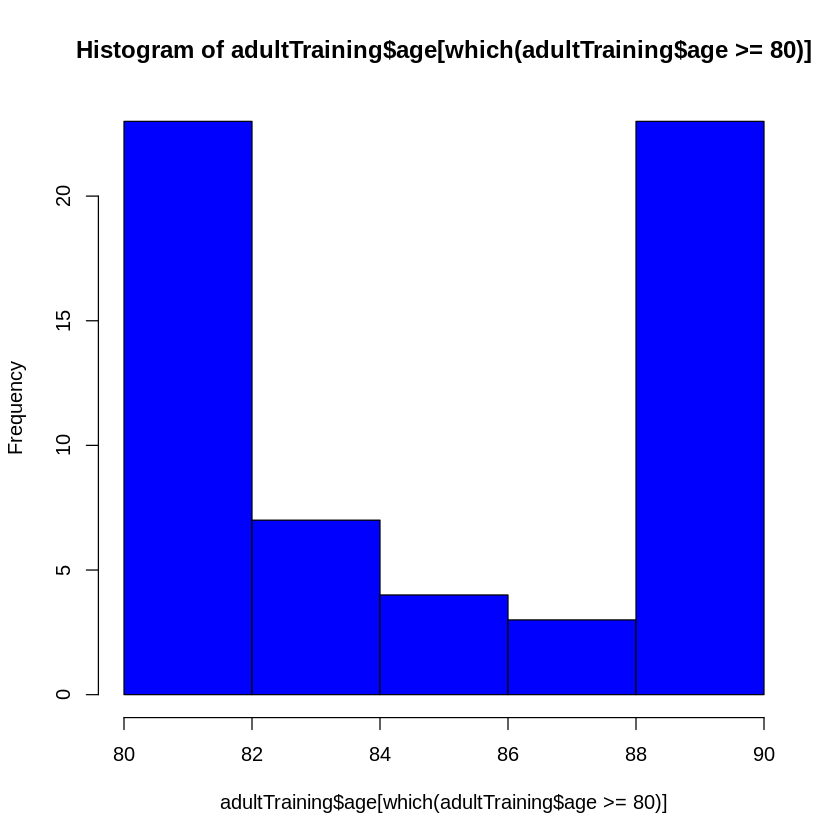

In [ ]:
#select records with age > 80 and create a histogram
hist(adultTraining$age[which(adultTraining$age >= 80)], col = "blue")

From the above histogram, we can see that there are a lot of age records with value 90, which we identified earlier as the most extreme outlier. It would seem as though there is some sort of age anomaly in this dataset because there are so many outliers.

##Summary of the above
Based on the above analysis, a few conclusions can be drawn.<ul><li>First, according to the workclass and sex contingency table, males have greater representation in every kind of position relative to females.</li><li>According to the sex and marital status contingency table, however, the results are more mixed:<ul><li>Females have greater representation in the following categories of marital status: Divorced, Married-AF-Spouse, Separated, and Widowed</li><li>Males have greater representation in the following categories: Married-civ-spouse, Married-spouse-absent, and Never-married</li></ul></li><li>Then, when the adultOver40 dataframe was created, new conclusions based on the marital status and sex contingency table could be drawn:<ul><li>No adult over 40 fit into the Married-AF-spouse category</li><li>Females had more representation in the following categories: Divorced, Separated, and Widowed</li><li>Males had more representation in the following categories:<li>Married-civ-spouse, Married-spouse-absent, and Never-married </li></ul></li><li>Then, it was discovered that there are indeed outliers in the education column:<ul><li>There are 113 outliers total</li></ul></li><li>Next, it was also discovered that there were outliers for the age column:<ul><li>There are 60 outliers total.</li><li>There were no outliers on the lower end, so the most extreme outlier was 90, the max of the age column.</li></ul></li><li>Finally, based on the histogram of adults >= 80, we could see that there was a potential age anomaly, as there were a lot of adults at age 90, which is an outlier as determined above.</li></ul>

##References:
help with the mode function implementation: https://www.tutorialspoint.com/r/r_mean_median_mode.htm